# Semantic Chunking

In [ ]:
!pip install -U langchain-community

In [ ]:
!pip install pypdf

In [ ]:
!pip install llama-index

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from langchain.document_loaders import PyPDFLoader
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import SimpleDirectoryReader
from langchain_core.documents import Document
from llama_index.core import Document as LlamaIndexDocument
from langchain.embeddings import HuggingFaceEmbeddings

**Loading Data**

In [8]:
loader = PyPDFLoader("/content/data/Understanding_Climate_Change.pdf")
docs = loader.load()
len(docs), type(docs)

(33, list)

In [10]:
type(docs[0])

langchain_core.documents.base.Document

In [11]:
vars(docs[0])

{'id': None,
 'metadata': {'source': '/content/data/Understanding_Climate_Change.pdf',
  'page': 0},
 'page_content': 'Understanding Climate Change \nChapter 1: Introduction to Climate Change \nClimate change refers to significant, long-term changes in the global climate. The term \n"global climate" encompasses the planet\'s overall weather patterns, including temperature, \nprecipitation, and wind patterns, over an extended period. Over the past century, human \nactivities, particularly the burning of fossil fuels and deforestation, have significantly \ncontributed to climate change. \nHistorical Context \nThe Earth\'s climate has changed throughout history. Over the past 650,000 years, there have \nbeen seven cycles of glacial advance and retreat, with the abrupt end of the last ice age about \n11,700 years ago marking the beginning of the modern climate era and human civilization. \nMost of these climate changes are attributed to very small variations in Earth\'s orbit that \nchange

**3 Possible methods to divide documents into sentences to apply semantic chunking -**  
- Use regex
- Use CharacterTextSplitter via separator parameter
- Use Llama Index

**By Using Llama Index**

In [15]:
sentence_splitter = SentenceSplitter(
                        chunk_size = 300,
                        chunk_overlap = 50
                    )

In [16]:
# Llama can convert files into documents internally
# docs = SimpleDirectoryReader(input_files=['/content/data/Understanding_Climate_Change.pdf']).load_data()

As we've done splitting manually so, we need to convert langchain document into llama documents.

In [20]:
llama_docs = []
for doc in docs:
    llama_docs.append(
        LlamaIndexDocument(
            text = doc.page_content,
            metadata=doc.metadata
        )
    )
print("LangChain Docs: ", len(docs), type(docs))
print("Llama Docs: ", len(llama_docs), type(llama_docs))

LangChain Docs:  33 <class 'list'>
Llama Docs:  33 <class 'list'>


In [21]:
llama_nodes = sentence_splitter.get_nodes_from_documents(llama_docs)
len(llama_nodes), type(llama_nodes)

(65, list)

In [23]:
type(llama_nodes[0])

llama_index.core.schema.TextNode

In [24]:
vars(llama_nodes[0])

{'id_': '000e4861-e4c7-4a81-8d26-229bab260d2e',
 'embedding': None,
 'metadata': {'source': '/content/data/Understanding_Climate_Change.pdf',
  'page': 0},
 'excluded_embed_metadata_keys': [],
 'excluded_llm_metadata_keys': [],
 'relationships': {<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='60d625bf-820b-44ab-b2ee-db430773aa82', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'source': '/content/data/Understanding_Climate_Change.pdf', 'page': 0}, hash='1d5266ead455dc237e7ba62f8479ed0a98d076c8702dd07814274316dc3d59c1'),
  <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='8771aa91-9de4-4558-92c1-d63e8ad7f5c3', node_type=<ObjectType.TEXT: '1'>, metadata={}, hash='dbe62fdb897665678072df6abc0858a45a2f764acad9fa42d09a2e3133b101b0')},
 'metadata_template': '{key}: {value}',
 'metadata_separator': '\n',
 'text': 'Understanding Climate Change \nChapter 1: Introduction to Climate Change \nClimate change refers to significant, long-term changes in the global climate. The term \n"

In [26]:
print("-- TEXT --")
print(llama_nodes[0].text, '\n')
print("-- METADATA --")
print(llama_nodes[0].metadata)

-- TEXT --
Understanding Climate Change 
Chapter 1: Introduction to Climate Change 
Climate change refers to significant, long-term changes in the global climate. The term 
"global climate" encompasses the planet's overall weather patterns, including temperature, 
precipitation, and wind patterns, over an extended period. Over the past century, human 
activities, particularly the burning of fossil fuels and deforestation, have significantly 
contributed to climate change. 
Historical Context 
The Earth's climate has changed throughout history. Over the past 650,000 years, there have 
been seven cycles of glacial advance and retreat, with the abrupt end of the last ice age about 
11,700 years ago marking the beginning of the modern climate era and human civilization. 
Most of these climate changes are attributed to very small variations in Earth's orbit that 
change the amount of solar energy our planet receives. During the Holocene epoch, which 
began at the end of the last ice age, hu

In [27]:
sentences = []
for doc in llama_docs:
    doc_text = doc.text
    doc_text = doc_text.replace('\n', ' ')
    doc_text = doc_text.replace('\t', ' ')
    sentences.extend(doc_text.split('.'))
len(sentences)

650

In [28]:
sentences[:10]

['Understanding Climate Change  Chapter 1: Introduction to Climate Change  Climate change refers to significant, long-term changes in the global climate',
 ' The term  "global climate" encompasses the planet\'s overall weather patterns, including temperature,  precipitation, and wind patterns, over an extended period',
 ' Over the past century, human  activities, particularly the burning of fossil fuels and deforestation, have significantly  contributed to climate change',
 "  Historical Context  The Earth's climate has changed throughout history",
 ' Over the past 650,000 years, there have  been seven cycles of glacial advance and retreat, with the abrupt end of the last ice age about  11,700 years ago marking the beginning of the modern climate era and human civilization',
 "  Most of these climate changes are attributed to very small variations in Earth's orbit that  change the amount of solar energy our planet receives",
 ' During the Holocene epoch, which  began at the end of the 

In [30]:
indexed_sentences = [{'index': i, 'sentence': sentence} for i, sentence in enumerate(sentences)]
len(indexed_sentences), type(indexed_sentences)

(650, list)

In [31]:
indexed_sentences[:7]

[{'index': 0,
  'sentence': 'Understanding Climate Change  Chapter 1: Introduction to Climate Change  Climate change refers to significant, long-term changes in the global climate'},
 {'index': 1,
  'sentence': ' The term  "global climate" encompasses the planet\'s overall weather patterns, including temperature,  precipitation, and wind patterns, over an extended period'},
 {'index': 2,
  'sentence': ' Over the past century, human  activities, particularly the burning of fossil fuels and deforestation, have significantly  contributed to climate change'},
 {'index': 3,
  'sentence': "  Historical Context  The Earth's climate has changed throughout history"},
 {'index': 4,
  'sentence': ' Over the past 650,000 years, there have  been seven cycles of glacial advance and retreat, with the abrupt end of the last ice age about  11,700 years ago marking the beginning of the modern climate era and human civilization'},
 {'index': 5,
  'sentence': "  Most of these climate changes are attribute

**Checking similarity and creating chunks accordingly**

In [ ]:
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

In [34]:
embedded_query = embeddings.embed_query('Hugging Face is a life saver! Arigatho!')
len(embedded_query), type(embedded_query)

(384, list)

In [43]:
pd.DataFrame(embedded_query[:10], columns=['Vector'])

,Vector
0,-0.047430
1,0.115004
2,0.049022
3,0.040908
4,-0.001452
5,0.020323
6,0.044100
7,-0.122241
8,-0.009283
9,-0.023366


In [57]:
chunks = []
distances = []
doc_embeddings = []

for i, sentence in tqdm(enumerate(sentences)):
    embedded_sentence = embeddings.embed_query(sentence)
    doc_embeddings.append(np.array(embedded_sentence))

    if i == 0:
        chunks.append([sentence])
    else:
      css = cosine_similarity(doc_embeddings[-1].reshape(1, -1), doc_embeddings[-2].reshape(1, -1))
      distances.append(1 - css)
      if css < 0.7:
        chunks[-1].append(sentence)
      else:
        chunks.append([sentence])

650it [00:18, 35.64it/s]


In [52]:
print("Number of document embeddings: ", len(doc_embeddings))
print("Number of chunks: ", len(chunks), type(chunks))

Number of document embeddings:  650
Number of chunks:  32 <class 'list'>


In [56]:
len(chunks[0]), type(chunks[0])

(12, list)

**Visualisation**

In [63]:
distances =[float(arr.ravel()[0]) for arr in distances]
len(distances)

649

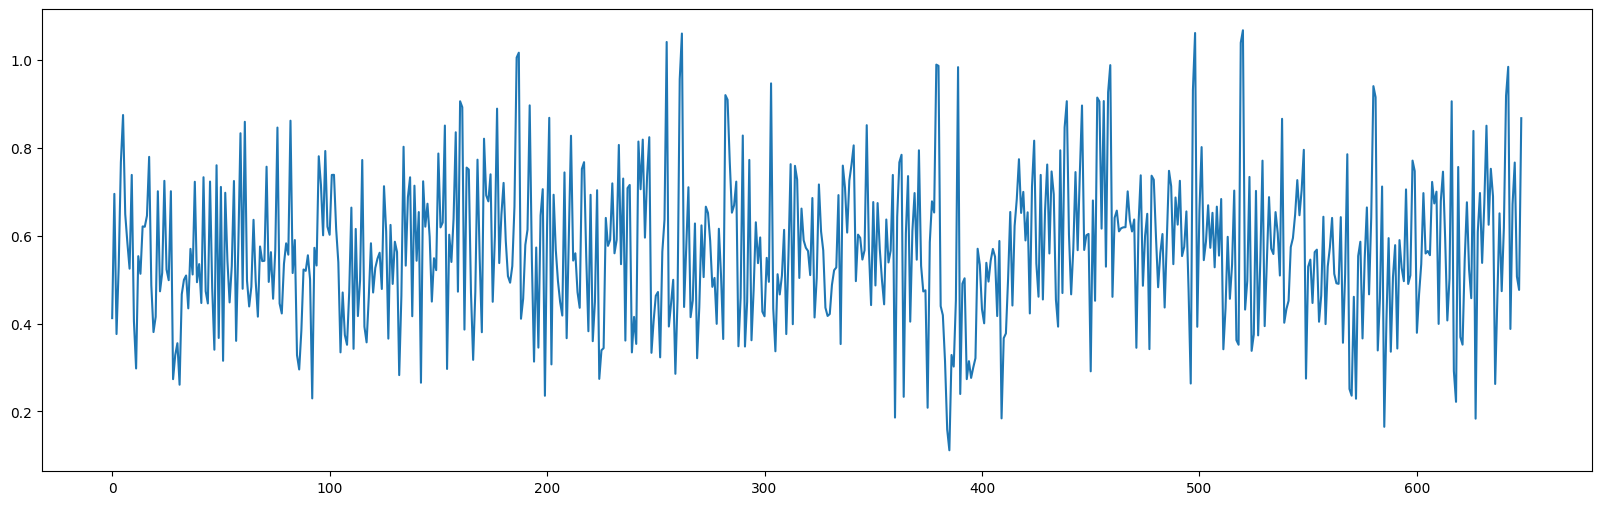

In [67]:
plt.figure(figsize=(20, 6))
plt.plot(distances);

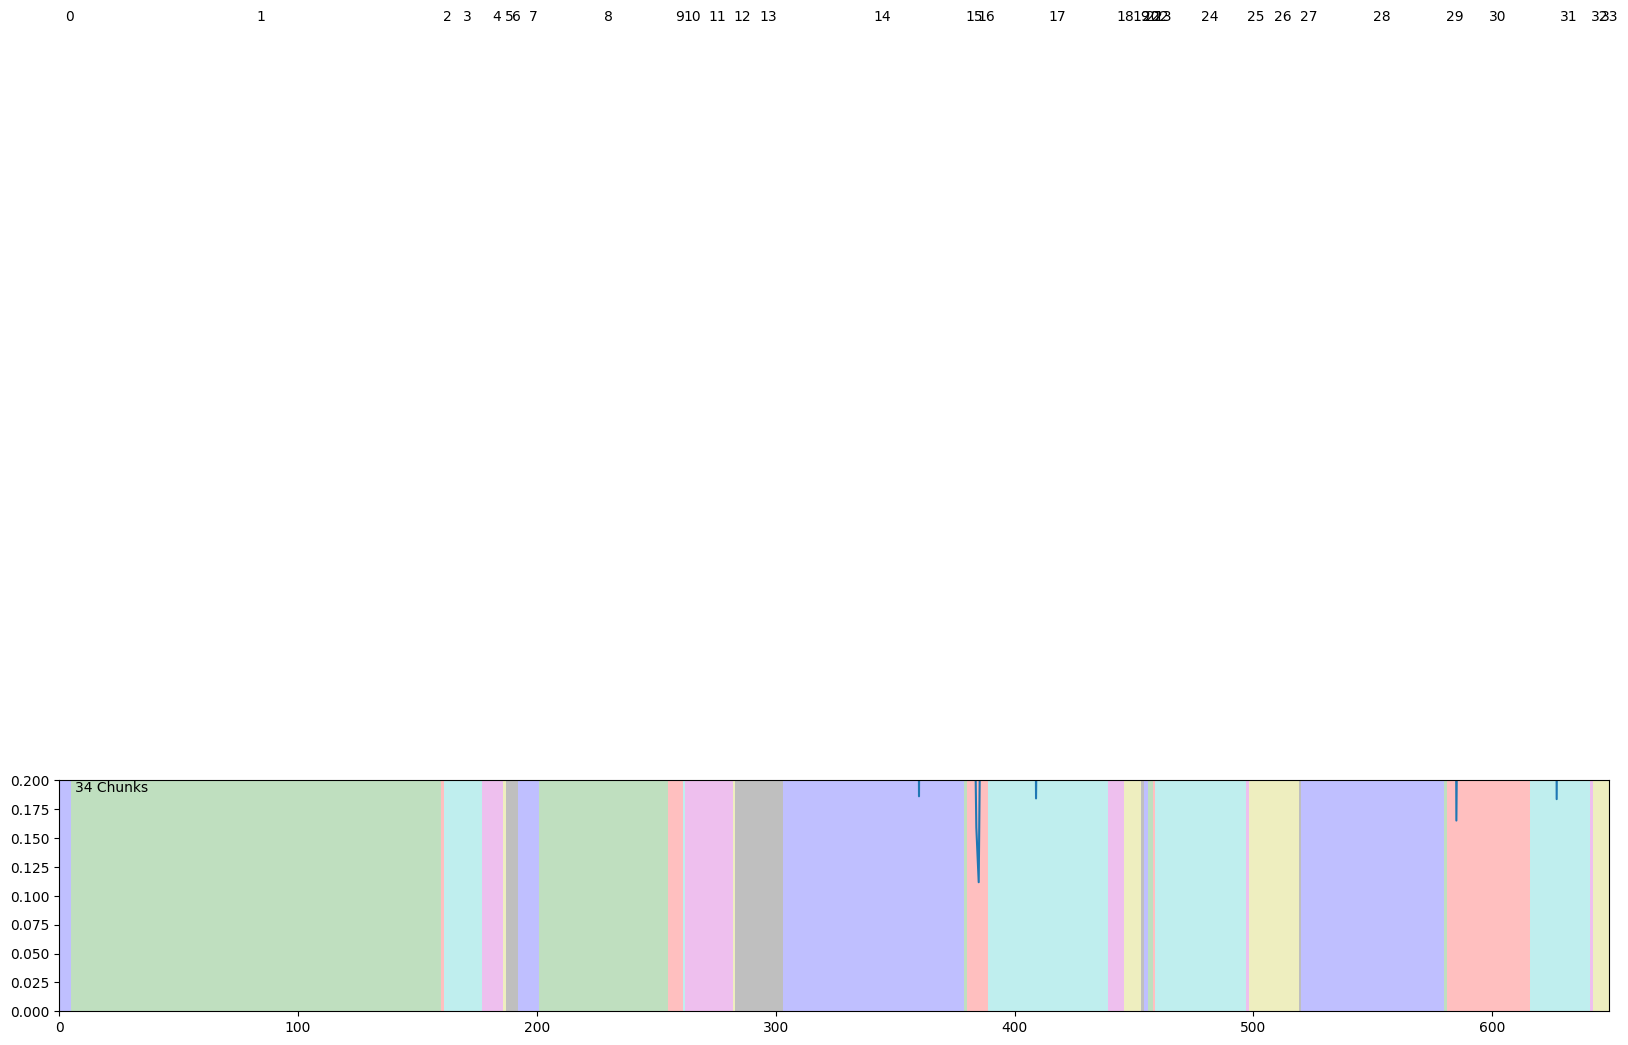

In [80]:
plt.figure(figsize=(20, 3))  # Adjust height to reduce vertical white space
plt.plot(distances)

y_upper_bound = 0.2
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# Distance threshold for outliers using numpy .percentile()
breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold)
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-')

# Count distances above threshold
num_distances_above_threshold = len([x for x in distances if x > breakpoint_distance_threshold])
plt.text(x=(len(distances) * 0.01), y=y_upper_bound * 0.95, s=f"{num_distances_above_threshold + 1} Chunks")

# Indices of distances above threshold
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold]

# Shading and text placement
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
start_index = 0

for i, breakpoint_index in enumerate(indices_above_thresh + [len(distances)]):
    plt.axvspan(start_index, breakpoint_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(
        x=np.mean([start_index, breakpoint_index]),  # Center of the span
        y=breakpoint_distance_threshold - (y_upper_bound / 20),  # Adjust closer to bar
        s=f"{i}"
    )
    start_index = breakpoint_index

plt.show()

**Combine them into acutual chunks**

In [82]:
final_chunks = [
    {
        'index': i,
        'chunk': '. '.join(chunk),
        'count': len(chunk)
    }
    for i, chunk in enumerate(chunks)
]
len(final_chunks), type(final_chunks)

(32, list)

In [84]:
final_chunks[:3]

[{'index': 0,
  'chunk': 'Understanding Climate Change  Chapter 1: Introduction to Climate Change  Climate change refers to significant, long-term changes in the global climate.  The term  "global climate" encompasses the planet\'s overall weather patterns, including temperature,  precipitation, and wind patterns, over an extended period.  Over the past century, human  activities, particularly the burning of fossil fuels and deforestation, have significantly  contributed to climate change.   Historical Context  The Earth\'s climate has changed throughout history.  Over the past 650,000 years, there have  been seven cycles of glacial advance and retreat, with the abrupt end of the last ice age about  11,700 years ago marking the beginning of the modern climate era and human civilization.   Most of these climate changes are attributed to very small variations in Earth\'s orbit that  change the amount of solar energy our planet receives.  During the Holocene epoch, which  began at the end